In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('uber.csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
# drop the first column
data.drop(data.columns[0], axis=1, inplace=True)

In [5]:
data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# EDA

<Axes: xlabel='fare_amount', ylabel='passenger_count'>

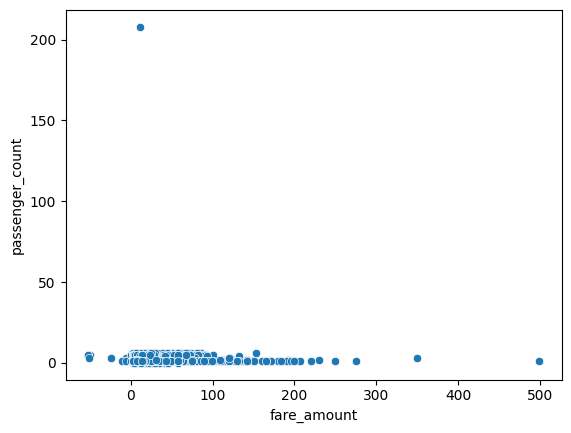

In [8]:
# is there a relationship between fare amoutn and passenger count?
sns.scatterplot(x='fare_amount', y='passenger_count', data=data)

In [11]:
# find value of correlation r using pandas
r = data['fare_amount'].corr(data['passenger_count'])
r

0.010149925554531453

In [15]:
# lets convert pickup_datetime to 
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [20]:
# let us split datetime to hours, minutes, seconds, day, month, year into new columns
data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_minute'] = data['pickup_datetime'].dt.minute
data['pickup_second'] = data['pickup_datetime'].dt.second
data['pickup_day'] = data['pickup_datetime'].dt.day
data['pickup_month'] = data['pickup_datetime'].dt.month
data['pickup_year'] = data['pickup_datetime'].dt.year


In [22]:
data.drop('pickup_datetime', axis=1, inplace=True)

In [24]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_month,pickup_year
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,52,6,7,5,2015
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,56,17,7,2009
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,45,0,24,8,2009
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,22,21,26,6,2009
4,2014-08-28 17:47:00.000000188,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,47,0,28,8,2014


In [27]:
# drop key
new_data = data.drop('key', axis=1)

In [28]:
new_data.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_month,pickup_year
fare_amount,1.000000,0.010457,-0.008481,0.008986,-0.011014,0.010150,-0.021473,-0.008035,-0.001259,0.001374,0.023814,0.118335
pickup_longitude,0.010457,1.000000,-0.816461,0.833026,-0.846324,-0.000414,0.002433,0.002781,-0.011270,0.005184,-0.004665,0.009966
pickup_latitude,-0.008481,-0.816461,1.000000,-0.774787,0.702367,-0.001560,-0.003822,-0.002919,0.011046,-0.008264,0.004625,-0.010233
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.003478,0.002557,-0.011077,0.005055,-0.003605,0.008467
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.002544,-0.001620,0.015280,-0.007835,0.003818,-0.011239
passenger_count,0.010150,-0.000414,-0.001560,0.000033,-0.000659,1.000000,0.013196,0.000688,-0.203017,0.003252,0.009773,0.004798
pickup_hour,-0.021473,0.002433,-0.003822,0.003478,-0.002544,0.013196,1.000000,0.001138,-0.013240,0.004677,-0.003926,0.002156
pickup_minute,-0.008035,0.002781,-0.002919,0.002557,-0.001620,0.000688,0.001138,1.000000,0.001987,-0.001217,-0.001485,-0.002805
pickup_second,-0.001259,-0.011270,0.011046,-0.011077,0.015280,-0.203017,-0.013240,0.001987,1.000000,-0.002107,-0.049937,0.083345
pickup_day,0.001374,0.005184,-0.008264,0.005055,-0.007835,0.003252,0.004677,-0.001217,-0.002107,1.000000,-0.017360,-0.012170


<Axes: >

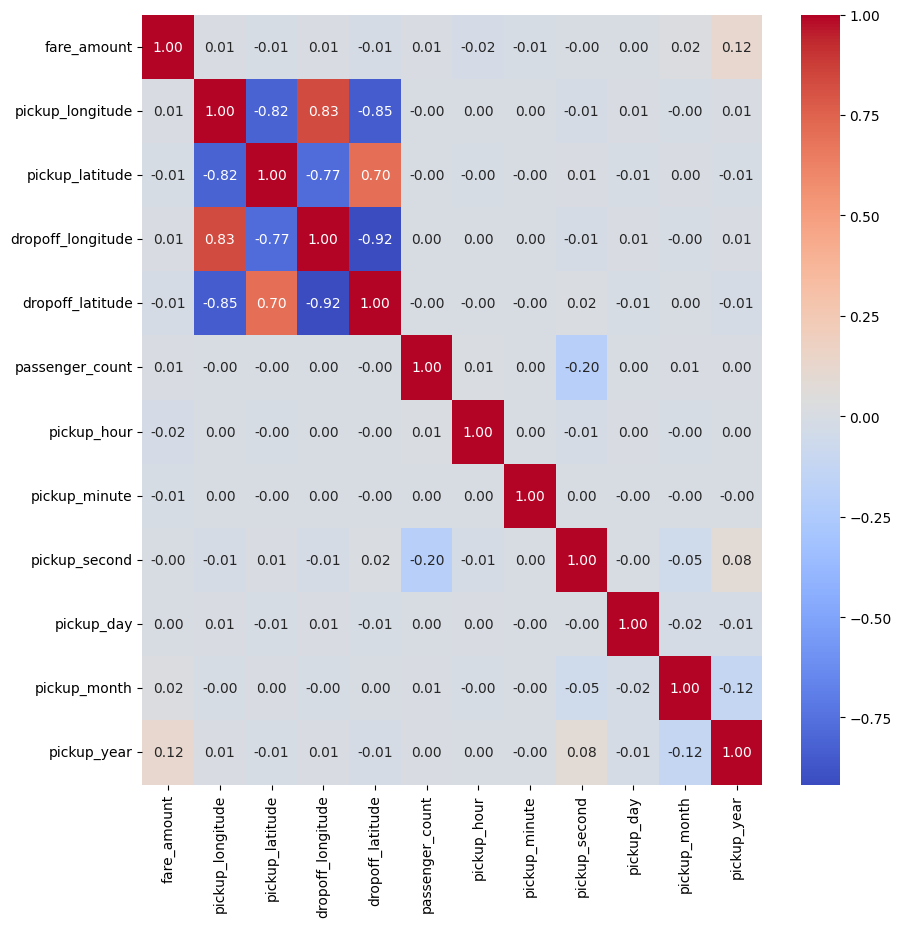

In [31]:
# visualize the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
# round the values to 2 decimal places
sns.heatmap(new_data.corr(), annot=True, ax=ax, cmap='coolwarm', fmt='.2f')

In [32]:
# calculate distance using euclidean distance formula as a new column
# sqrt((x2 - x1)^2 + (y2 - y1)^2)
# we will use the latitude and longitude columns to calculate distance
for i in range(len(new_data)):
    x1 = new_data['pickup_latitude'][i]
    x2 = new_data['dropoff_latitude'][i]
    y1 = new_data['pickup_longitude'][i]
    y2 = new_data['dropoff_longitude'][i]
    distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    new_data['distance'] = distance
new_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_month,pickup_year,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,52,6,7,5,2015,0.048729
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,56,17,7,2009,0.048729
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,45,0,24,8,2009,0.048729
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,22,21,26,6,2009,0.048729
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,47,0,28,8,2014,0.048729


<Axes: xlabel='distance', ylabel='fare_amount'>

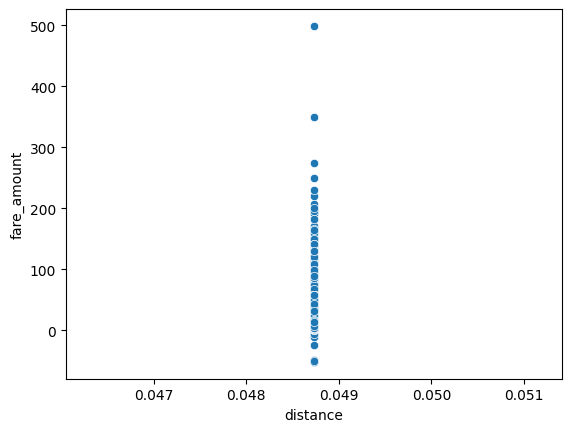

In [33]:
# plot distance and fare amount, x is distance and y is fare amount
sns.scatterplot(x='distance', y='fare_amount', data=new_data)

<Axes: xlabel='distance', ylabel='fare_amount'>

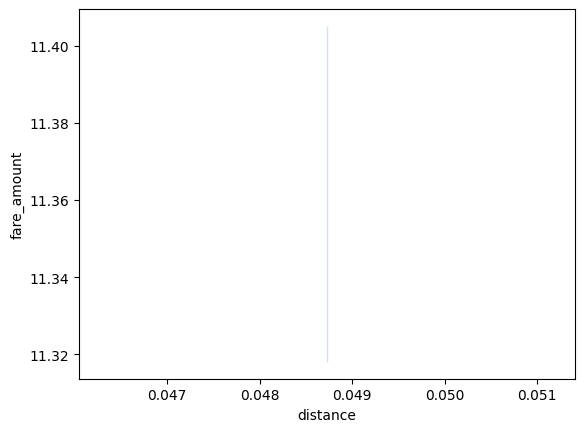

In [34]:
# plot a line chart
sns.lineplot(x='distance', y='fare_amount', data=new_data)

In [35]:
new_data['distance'].corr(new_data['fare_amount'])

-2.1001076189906018e-16

In [36]:
new_data['distance'].unique

<bound method Series.unique of 0         0.048729
1         0.048729
2         0.048729
3         0.048729
4         0.048729
            ...   
199995    0.048729
199996    0.048729
199997    0.048729
199998    0.048729
199999    0.048729
Name: distance, Length: 200000, dtype: float64>